### Name: Samakash R S
### Reg no: 212223230182

In [24]:
import cv2
import numpy as np

image = cv2.imread('Apollo-11-launch.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.imshow('Original Image', image_rgb)
cv2.waitKey(0)
cv2.destroyAllWindows()
roi_mask = np.zeros_like(image_rgb)
roi_mask[100:300, 200:400, :] = 255  
segmented_roi = cv2.bitwise_and(image_rgb, roi_mask)
cv2.imshow('Segmented ROI', segmented_roi)
cv2.waitKey(0)
cv2.destroyAllWindows()

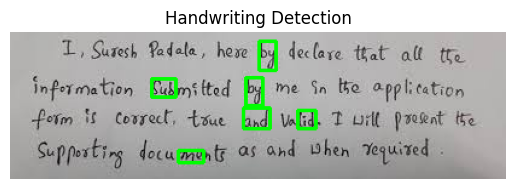

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_handwriting(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blurred, 50, 150)
    contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    min_area = 100
    text_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area]
    img_copy = img.copy()
    for contour in text_contours:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(img_copy, (x, y), (x + w, y + h), (0, 255, 0), 2)
        
    img_rgb = cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title('Handwriting Detection')
    plt.axis('off')
    plt.show()
    
image_path = 'hand.jpg'
detect_handwriting(image_path)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']
80
[4]


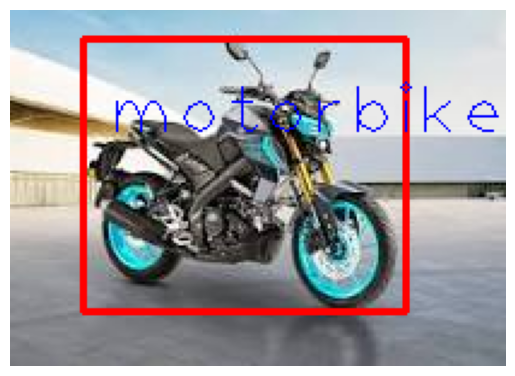

In [23]:
config_file='ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model='frozen_inference_graph.pb'

model=cv2.dnn_DetectionModel(frozen_model,config_file)

classLabels = []
file_name='Labels.txt'
with open(file_name,'rt')as fpt:
    classLabels=fpt.read().rstrip('\n').split('\n')

print(classLabels)
print(len(classLabels))
img=cv2.imread('bike1.jpeg')
plt.imshow(img)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)#255/2=127.5
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)
ClassIndex,confidence,bbox=model.detect(img,confThreshold=0.5)
print(ClassIndex)
font_scale=2
font=cv2.FONT_HERSHEY_PLAIN
for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidence.flatten(),bbox):
    cv2.rectangle(img,boxes,(0,0,255),2)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(255,0,0),thickness=1)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()